In [148]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [149]:
import pandas as pd
from matplotlib import pyplot as plt

In [150]:
work_dir = '/content/drive/MyDrive/Lymphoma_PPFE_vs_Cryo/'          #you might need to change it in your case, look at your folder structure
manual_dir = work_dir + 'images_1_MANUAL/'
auto_dir = work_dir + 'images_1_AUTO/alfa/'

In [151]:
df0 = pd.read_excel(auto_dir+'measurements_from_stardist_no_post_processing.xlsx')
df1 = pd.read_excel(auto_dir+'measurements_from_stardist_NO_small_border.xlsx')
df2 = pd.read_csv(manual_dir+'measurements_from_qupath_ALFA.csv')
df3 = pd.read_csv(manual_dir+'measurements_qupath_Aisha.csv')

In [152]:
df2 = pd.concat([df2, df3])

In [153]:
df2['Image'].unique()

array(['6_L-08 FFPE Exp 12 ms Gain 1 Satur 100_crop_1.tif',
       '8_L04-2 Cryo Exp 15 ms Gain 1 Satur 100_crop_1.tif',
       '11_L04-2 FFPE Exp 16 ms Gain 1 Satur 100_crop_1.tif',
       '14_L07 FFPE 2 Exp 16 ms Gain 1 Satur 100_crop_1.tif',
       '18_L08 Cryo Exp 15 ms Gain 1 Satur 100_crop_2.tif',
       '10_L04-2 FFPE Exp 15 ms Gain 1 Satur 100_crop_1.tif',
       '6_L-08 FFPE Exp 12 ms Gain 1 Satur 100_crop_4.tif',
       '5_L-07 FFPE Exp 16 ms Gain 1 Satur 100_crop_2.tif',
       '19_L08 FFPE Exp 15 ms Gain 1 Satur 100_crop_1.tif',
       '6_L-08 FFPE Exp 12 ms Gain 1 Satur 100_crop_3.tif',
       '6_L-08 FFPE Exp 12 ms Gain 1 Satur 100_crop_2.tif',
       '14_L07 FFPE 2 Exp 16 ms Gain 1 Satur 100_crop_2.tif',
       '22_L10-1 FFPE 2 Exp 14 ms Gain 1 Satur 100_crop_2.tif',
       '10_L04-2 FFPE Exp 15 ms Gain 1 Satur 100_crop_3.tif',
       '13_L07 Cryo Exp 15 ms Gain 1 Satur 100_crop_1.tif',
       '20_L10-1 Cryo Exp 16 ms Gain 1 Satur 100 WB_crop_1.tif',
       '18_L08 Cryo 

In [154]:
#1 μm = 0.0037795280352161 PX.
df2['area'] = df2['Area µm^2']*(0.0037795280352161**2)

In [155]:
df2 = df2[df2['Class'] !=2]

In [156]:
images = list(df2['Image'].unique())

----------------------------------------------------------------
IMAGE NAME:  18_L08 Cryo Exp 15 ms Gain 1 Satur 100_crop_3.tif
N manually labeled cells:  107
N auto labeled cells:  140
N auto labeled cells (POSTPROCESING):  120
----------------------------------------------------------------


Text(0.5, 1.0, 'Area histogram for 18_L08 Cryo Exp 15 ms Gain 1 Satur 100_crop_3.tif')

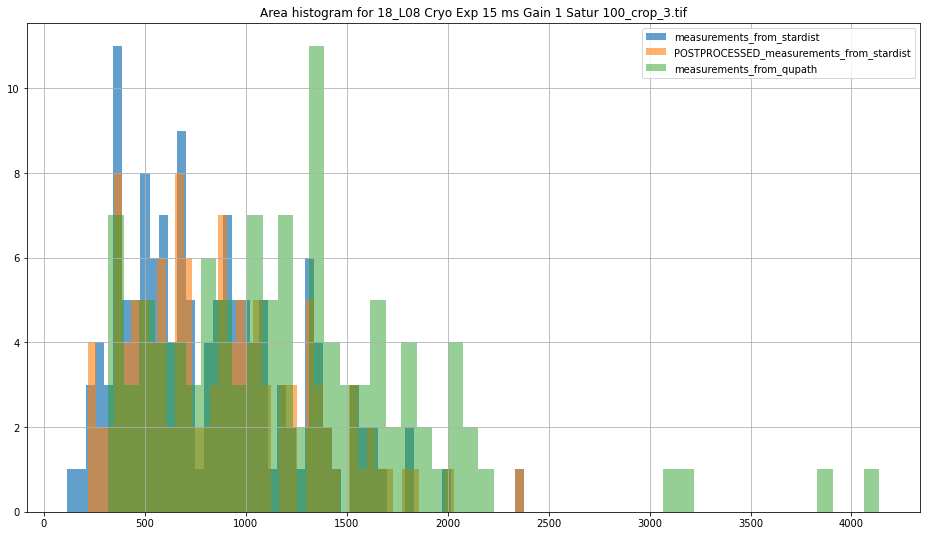

In [178]:
i = 16
manual_name = images[i]
auto_name = images[i].replace('.tif', '_SELECTED.tif')
print("----------------------------------------------------------------")
print("IMAGE NAME: ", manual_name)
print("N manually labeled cells: ", df2[df2['Image'] == manual_name].shape[0])
print("N auto labeled cells: ", df0[df0['img'] == auto_name].shape[0])
print("N auto labeled cells (POSTPROCESING): ", df1[df1['img'] == auto_name].shape[0])
print("----------------------------------------------------------------")
df0[df0['img'] == auto_name]['area'].hist(bins=50, figsize=(16, 9),alpha = 0.7, label='measurements_from_stardist')
df1[df1['img'] == auto_name]['area'].hist(bins=50, figsize=(16, 9),alpha = 0.6, label='POSTPROCESSED_measurements_from_stardist')
df2[df2['Image'] == manual_name]['area'].hist(bins=50, figsize=(16, 9),alpha = 0.5, label='measurements_from_qupath')
# df2[df2['Image'] == manual_name]['area'].hist(bins=df2[df2['Image'] == manual_name].shape[0], figsize=(25, 9),alpha = 0.5, label='measurements_from_qupath')
# df0[df0['img'] == auto_name]['area'].hist(bins=df0[df0['img'] == auto_name].shape[0], figsize=(25, 9),alpha = 0.5, label='measurements_from_stardist')
# df1[df1['img'] == auto_name]['area'].hist(bins=df1[df1['img'] == auto_name].shape[0], figsize=(25, 9),alpha = 0.3, label='POSTPROCESSED_measurements_from_stardist')
plt.legend(loc='upper right')
plt.title("Area histogram for "+manual_name)